## EDA - exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('train.csv')
X = df.iloc[:, 1:-2]
y = df.iloc[:, -1]

print('number of null values = ', df.isnull().any().sum())

number of null values =  0


In [2]:
table = df.describe()
table

,PID,gender,age,vessel,seg,OS_PB40,OS_PB70,OS_MLA,MLA,EEM_MLA,...,RI_worst_ref,RI_worst_prox5,variance_lumen_worst,variance_lumen_PB40,variance_plaque_worst,variance_plaque_PB40,long_eccentricity_worst,long_eccentricity_PB40,ffr,STENT
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,725.305918,1.282849,62.127382,1.713139,1.619860,131.994985,376.914744,1531.517553,3.138608,11.871585,...,0.336217,0.224338,0.938827,6.125696,1.756507,5.388460,0.069313,0.527752,0.823972,0.313942
std,409.574490,0.450609,9.785799,0.991914,0.623282,317.464973,625.692907,923.323784,1.452565,4.444459,...,0.583537,0.368571,1.575167,4.934346,3.136355,4.949726,0.048303,0.267705,0.093477,0.464326
min,0.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.795713,2.245191,...,0.000000,0.000000,0.003076,0.000000,0.004730,0.000000,0.000324,0.000000,0.390000,0.000000
25%,373.000000,1.000000,55.000000,1.000000,1.000000,0.000000,0.000000,825.000000,2.101740,8.582661,...,0.000000,0.000000,0.170534,2.582720,0.290059,2.244673,0.048077,0.328277,0.770000,0.000000
50%,729.000000,1.000000,63.000000,1.000000,2.000000,0.000000,0.000000,1433.000000,2.718459,11.479878,...,0.000000,0.000000,0.429464,4.855758,0.834275,4.215746,0.059406,0.545016,0.840000,0.000000
75%,1079.000000,2.000000,69.000000,3.000000,2.000000,49.000000,646.000000,2138.000000,3.785593,14.447784,...,0.691115,0.504344,1.065644,8.436666,2.019029,7.221237,0.075911,0.739936,0.890000,1.000000
max,1446.000000,2.000000,87.000000,4.000000,3.000000,3843.000000,3825.000000,5925.000000,14.381330,37.634006,...,3.608751,1.804375,18.838684,40.858325,45.884707,53.428414,0.781250,1.000000,1.000000,1.000000


In [3]:
df.head(5)
X

,gender,age,vessel,seg,OS_PB40,OS_PB70,OS_MLA,MLA,EEM_MLA,PB_MLA,...,RI_MLA_ref,RI_MLA_prox5,RI_worst_ref,RI_worst_prox5,variance_lumen_worst,variance_lumen_PB40,variance_plaque_worst,variance_plaque_PB40,long_eccentricity_worst,long_eccentricity_PB40
0,1,58,2,3,539,0,2137,3.092339,7.581687,0.592130,...,0.590296,0.492246,0.628797,0.524351,0.502976,15.752692,0.497278,7.221237,0.051671,0.550465
1,1,76,3,2,0,0,494,3.060281,17.569856,0.825822,...,0.000000,0.000000,0.000000,0.000000,1.312833,5.876139,4.643138,1.027108,0.186335,0.613665
2,2,70,1,2,0,0,1060,3.450544,13.905366,0.751855,...,0.000000,0.000000,0.000000,0.000000,0.223531,11.209799,0.707185,9.101215,0.069061,0.488029
3,1,58,1,1,0,0,1073,1.953591,8.873550,0.779841,...,0.000000,0.000000,0.000000,0.000000,0.961234,2.237851,2.101279,1.537554,0.068618,0.490851
4,1,58,1,1,0,565,1433,1.954800,6.538078,0.701013,...,0.000000,0.000000,0.000000,0.000000,0.207268,4.844191,0.285078,6.244298,0.075796,0.724103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,1,54,1,1,52,0,862,8.106433,20.282146,0.600317,...,0.920550,0.760605,0.924032,0.763482,1.353989,3.348841,0.429829,0.925077,0.058708,0.317025
993,1,71,1,2,0,1041,2381,1.879652,10.975155,0.828736,...,0.000000,0.000000,0.000000,0.000000,4.100358,29.428133,5.388718,3.776405,0.049245,0.781681
994,2,67,1,2,0,0,2053,2.885939,5.548012,0.479825,...,0.000000,0.000000,0.000000,0.000000,0.023033,0.374327,0.088951,4.084487,0.073064,1.000000
995,2,77,3,1,253,0,1328,4.354144,17.333747,0.748805,...,0.715931,0.821508,0.692181,0.794255,0.758025,7.470905,1.978921,5.952544,0.071531,0.512637


Text(0.5, 1.0, 'histogram of y labels')

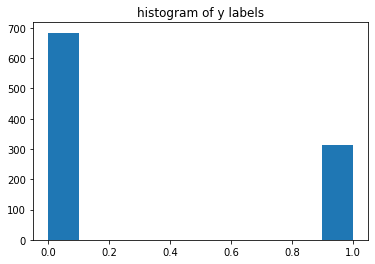

In [30]:
#histogram of labels
plt.hist(y)
plt.title('histogram of y labels')

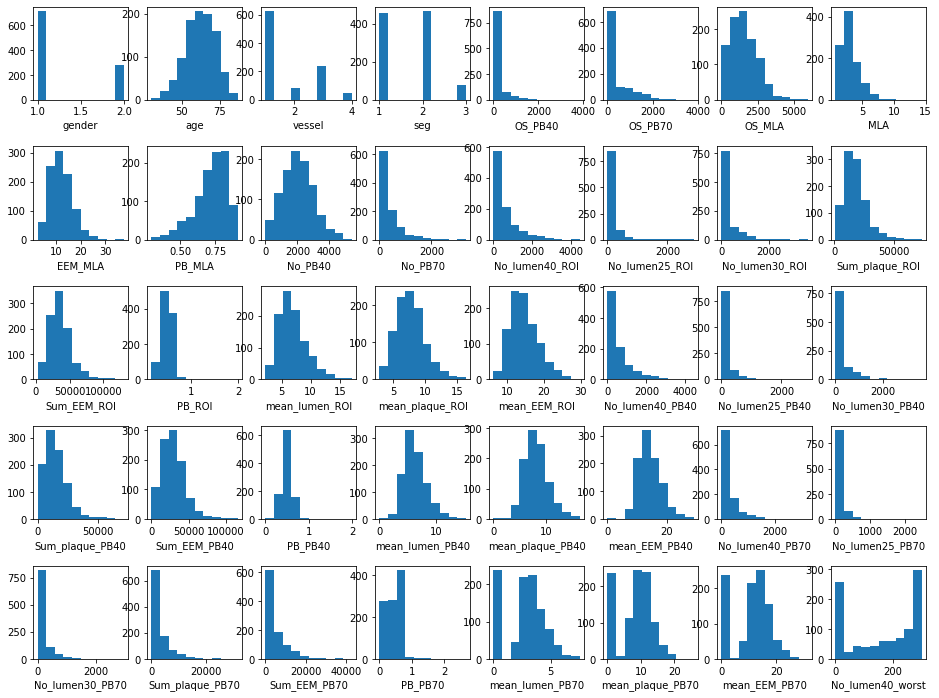

In [18]:
#histograms of feature data x

plt.figure(figsize = (16,12))
for i in range(1,41):
    plt.subplots_adjust(hspace=.5)
    plt.subplot(5,8,i)
    plt.hist(X.iloc[:,i-1])
    plt.xlabel(X.columns[i-1])

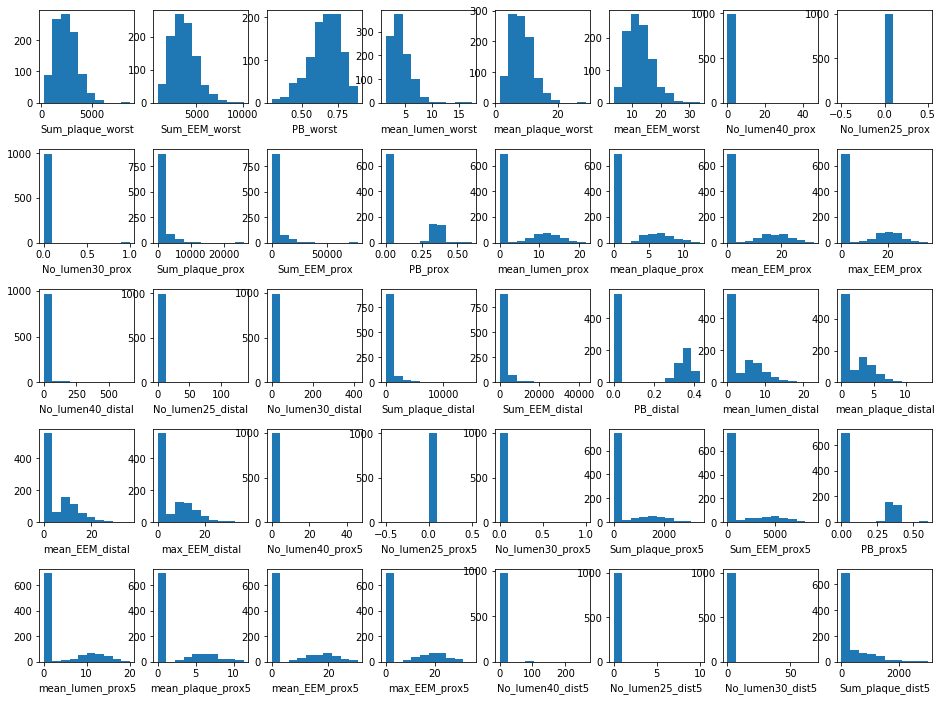

In [31]:
plt.figure(figsize = (16,12))
for i in range(1,41):
    plt.subplots_adjust(hspace=.5)
    plt.subplot(5,8,i)
    plt.hist(X.iloc[:,i+40])
    plt.xlabel(X.columns[i+40])

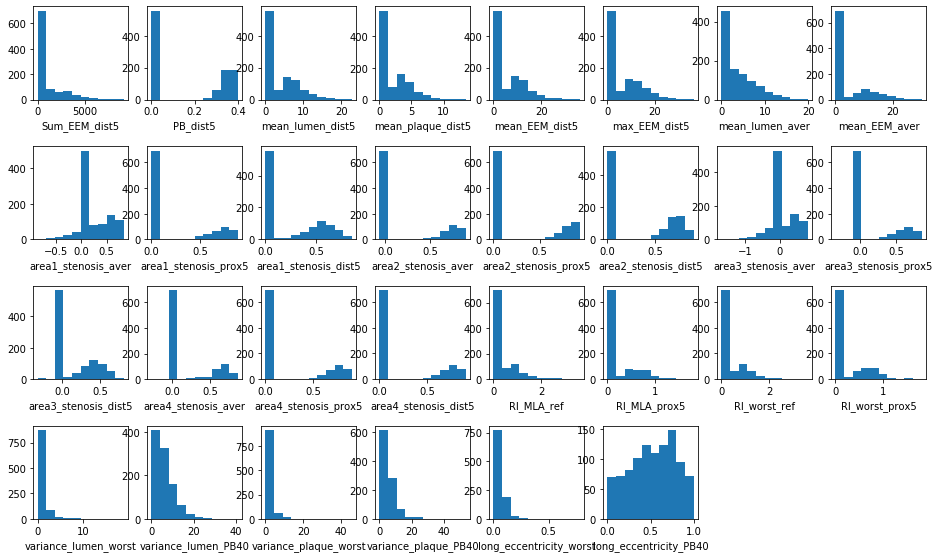

In [25]:
plt.figure(figsize = (16,12))
for i in range(1,31):
    plt.subplots_adjust(hspace=.5)
    plt.subplot(5,8,i)
    plt.hist(X.iloc[:,i+80])
    plt.xlabel(X.columns[i+80])

In [5]:
datatype = X.dtypes
set(datatype)

{dtype('int64'), dtype('float64')}